In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
Consumer_Key = "CGxhnEQwmi5QJl69NiqmkhEdw"
Consumer_Secret_Key = "WubfToWPZhwxEHlmRwaPUFS8cZpwHDsD1jNxdg8v1L4ejIefbW"
Access_Token = "1334735354927071232-IqStzBg2yJSPripFOKvggD1cb0mOTE"
Access_Token_Secret = "6fm8Fm2ZcUAxJq1yrMEkNdv95no6mkRoCS6Xk80ysPdFs"

In [ ]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [65]:
posts = api.user_timeline(screen_name="KampusUpdate", count = 5, lang ="id", tweet_mode="extended")

#  Print the last 5 tweets
print("5 Tweets terakhir:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

5 Tweets terakhir:

1) Bayangkan dapat gaji Jakarta , bisa kerja di mana aja fleksibel remote worker, dan bisa liburan sambil kerja pindah-pindah kota/negara sesuai keinginan kalian.

Kalian pengen kerja dari kota/negara mana?

2) Hi Sobat!

Waktu registrasi event The 1st IndiHome Business Case Competition akan segera berakhir. Yuk daftarkan team tearbaikmu di https://t.co/QsJAo2Bieh sebelum 18 Desember 2020.

Jadilah pemenang dan team kebanggaan kampusmu! https://t.co/COdeCWegPM

3) EcoProject 2021 mempersembahkan Rangkaian Lomba “Create for The Climate Change”!
Tuangkan ide, aksi dan potret bumi darimu untuk menyelamatkan bumi dari ganasnya perubahan iklim!

Pendaftaran dan Panduan:
https://t.co/p722fZacMi

IG: ecoproject2021 https://t.co/0g7slkilDp

4) @txtdarigajelas Hi Min, thank you sudah up tweet @KampusUpdate, ya. 😊

5) AFFINITY 2020, present
✨Perfectly Imperfect : Prove Yourself to Yourself✨
🗓 Friday, 18 December 2020
🕗19.00 - 21.30 WIB
📍 ZOOM
Only 20k and free e-certificate!!

In [55]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,"Bayangkan dapat gaji Jakarta , bisa kerja di m..."
1,Hi Sobat!\n\nWaktu registrasi event The 1st In...
2,EcoProject 2021 mempersembahkan Rangkaian Lomb...
3,"@txtdarigajelas Hi Min, thank you sudah up twe..."
4,"AFFINITY 2020, present\n✨Perfectly Imperfect :..."


In [56]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hashtag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"Bayangkan dapat gaji Jakarta , bisa kerja di m..."
1,Hi Sobat!\n\nWaktu registrasi event The 1st In...
2,EcoProject 2021 mempersembahkan Rangkaian Lomb...
3,"Hi Min, thank you sudah up tweet , ya. 😊"
4,"AFFINITY 2020, present\n✨Perfectly Imperfect :..."


In [57]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"Bayangkan dapat gaji Jakarta , bisa kerja di m...",0.200,-0.100000
1,Hi Sobat!\n\nWaktu registrasi event The 1st In...,0.000,0.000000
2,EcoProject 2021 mempersembahkan Rangkaian Lomb...,0.000,0.000000
3,"Hi Min, thank you sudah up tweet , ya. 😊",0.000,0.000000
4,"AFFINITY 2020, present\n✨Perfectly Imperfect :...",0.575,0.195312


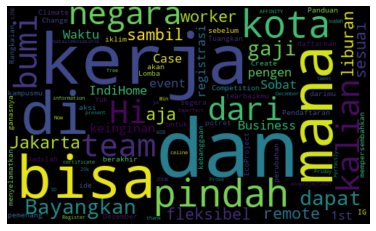

In [58]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [59]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Bayangkan dapat gaji Jakarta , bisa kerja di m...",0.200,-0.100000,Negative
1,Hi Sobat!\n\nWaktu registrasi event The 1st In...,0.000,0.000000,Neutral
2,EcoProject 2021 mempersembahkan Rangkaian Lomb...,0.000,0.000000,Neutral
3,"Hi Min, thank you sudah up tweet , ya. 😊",0.000,0.000000,Neutral
4,"AFFINITY 2020, present\n✨Perfectly Imperfect :...",0.575,0.195312,Positive


In [60]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Bayangkan dapat gaji Jakarta , bisa kerja di mana aja fleksibel remote worker, dan bisa liburan sambil kerja pindah-pindah kota/negara sesuai keinginan kalian.

Kalian pengen kerja dari kota/negara mana?



In [61]:
print('Printing Positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing Positive tweets:

1) AFFINITY 2020, present
✨Perfectly Imperfect : Prove Yourself to Yourself✨
🗓 Friday, 18 December 2020
🕗19.00 - 21.30 WIB
📍 ZOOM
Only 20k and free e-certificate!!

Register Now! 


For further information :
LINE ID: nataliekosasih16 / celine.s 



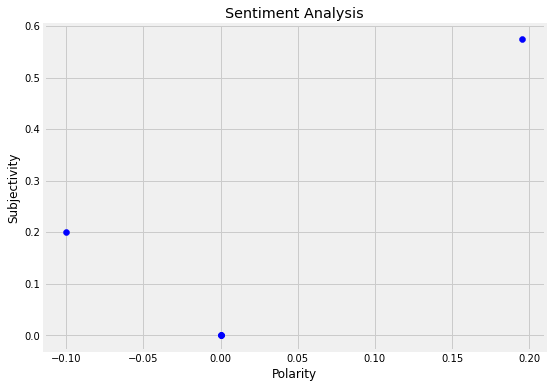

In [62]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

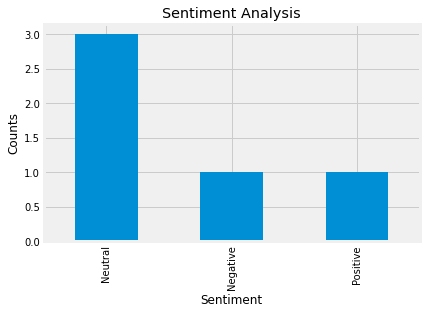

In [63]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()